<a href="https://colab.research.google.com/github/KONANOFFICIAL/KONANOFFICIAL/blob/main/AIDSPRED.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

%matplotlib inline
sns.set(color_codes=True)
import warnings
warnings.filterwarnings('ignore')

loading data set


In [2]:
df=pd.read_csv('AIDS_Classification.csv')

first five rows testing

In [3]:
df.head(5)

,time,trt,age,wtkg,hemo,homo,drugs,karnof,oprior,z30,...,str2,strat,symptom,treat,offtrt,cd40,cd420,cd80,cd820,infected
0,948,2,48,89.8128,0,0,0,100,0,0,...,0,1,0,1,0,422,477,566,324,0
1,1002,3,61,49.4424,0,0,0,90,0,1,...,1,3,0,1,0,162,218,392,564,1
2,961,3,45,88.4520,0,1,1,90,0,1,...,1,3,0,1,1,326,274,2063,1893,0
3,1166,3,47,85.2768,0,1,0,100,0,1,...,1,3,0,1,0,287,394,1590,966,0
4,1090,0,43,66.6792,0,1,0,100,0,1,...,1,3,0,0,0,504,353,870,782,0


In [4]:
df.shape

(2139, 23)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2139 entries, 0 to 2138
Data columns (total 23 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   time      2139 non-null   int64  
 1   trt       2139 non-null   int64  
 2   age       2139 non-null   int64  
 3   wtkg      2139 non-null   float64
 4   hemo      2139 non-null   int64  
 5   homo      2139 non-null   int64  
 6   drugs     2139 non-null   int64  
 7   karnof    2139 non-null   int64  
 8   oprior    2139 non-null   int64  
 9   z30       2139 non-null   int64  
 10  preanti   2139 non-null   int64  
 11  race      2139 non-null   int64  
 12  gender    2139 non-null   int64  
 13  str2      2139 non-null   int64  
 14  strat     2139 non-null   int64  
 15  symptom   2139 non-null   int64  
 16  treat     2139 non-null   int64  
 17  offtrt    2139 non-null   int64  
 18  cd40      2139 non-null   int64  
 19  cd420     2139 non-null   int64  
 20  cd80      2139 non-null   int6

In [6]:
df.isnull().sum()


,0
time,0
trt,0
age,0
wtkg,0
hemo,0
homo,0
drugs,0
karnof,0
oprior,0
z30,0


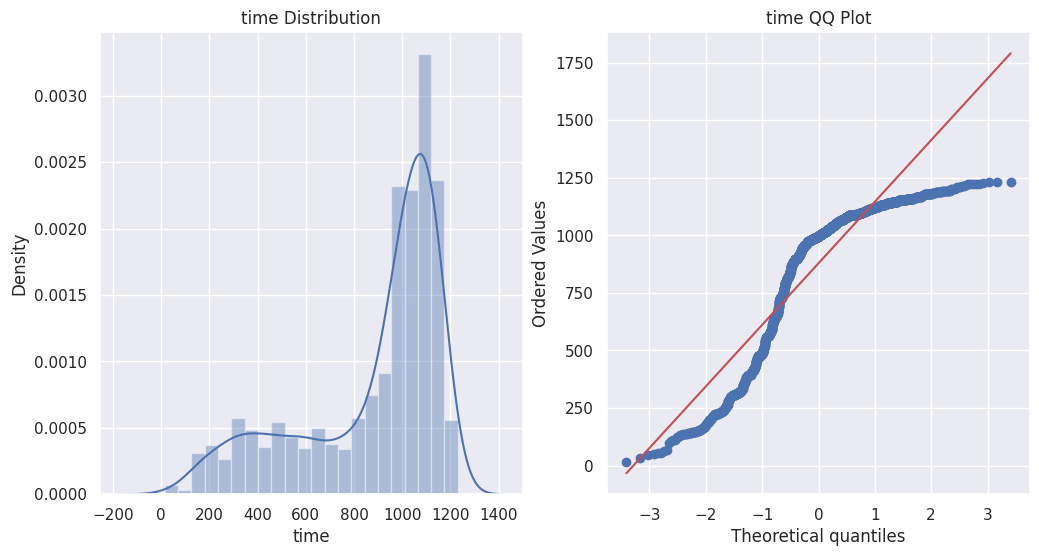

In [7]:
import scipy.stats as stats

plt.figure(figsize=(12, 6))

plt.subplot(121)
sns.distplot(df['time'])
plt.title('time Distribution')

plt.subplot(122)
stats.probplot(df['time'], dist="norm", plot=plt)
plt.title('time QQ Plot')

plt.show()


In [8]:
from sklearn.preprocessing import QuantileTransformer
qt_normal = QuantileTransformer(output_distribution='normal')

df['time'] = qt_normal.fit_transform(df[['time']])

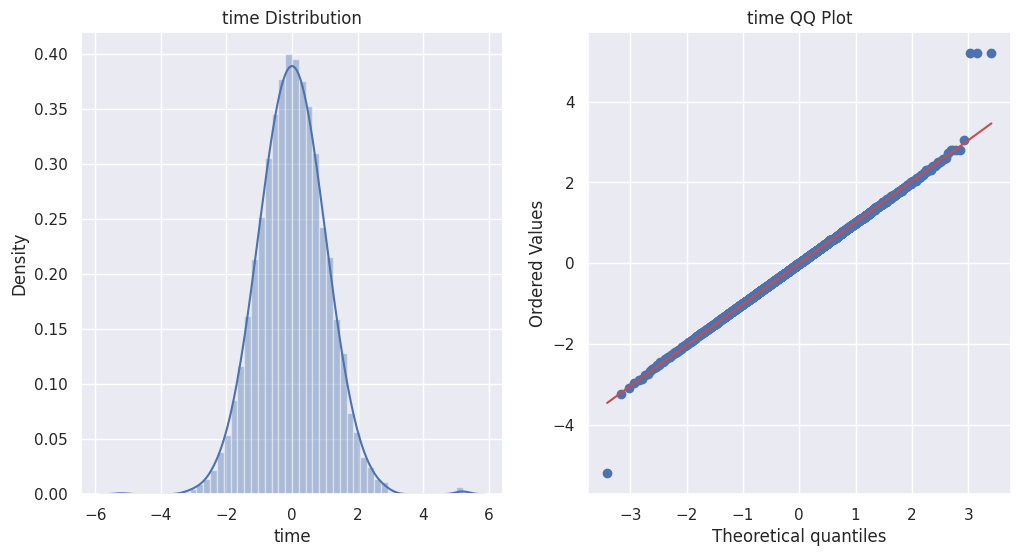

In [9]:
import scipy.stats as stats

plt.figure(figsize=(12, 6))

plt.subplot(121)
sns.distplot(df['time'])
plt.title('time Distribution')

plt.subplot(122)
stats.probplot(df['time'], dist="norm", plot=plt)
plt.title('time QQ Plot')

plt.show()

limits finding

In [10]:
percentile25=df["time"].quantile(0.25)
percentile75=df["time"].quantile(0.75)

iqr progress

In [13]:
iqr=percentile75 - percentile25
iqr


1.3568802623184744

distance variable use

In [14]:
upper_limit=percentile75 + 1.5*iqr # UPPER LIMIT
lower_limit=percentile25 - 1.5*iqr # LOWER LIMIT
print("upper_limit",upper_limit)
print("lower_limit",lower_limit)


upper_limit 2.7184982003828484
lower_limit -2.709022848891048


cap

In [15]:
new_df_cap = df.copy()

new_df_cap["time"]= np.where(
    new_df_cap["time"] > upper_limit,
    upper_limit,
    np.where(
        new_df_cap["time"] < lower_limit,
        lower_limit,
        new_df_cap["time"]
    )

)

In [16]:
df['time'] = new_df_cap['time']

seaborn work

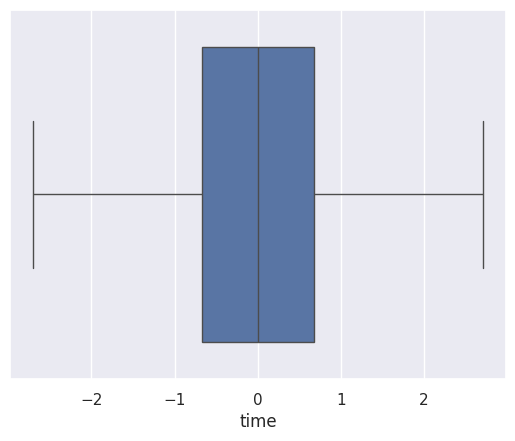

In [17]:
sns.boxplot(x=df['time'])
plt.show()

normalizing

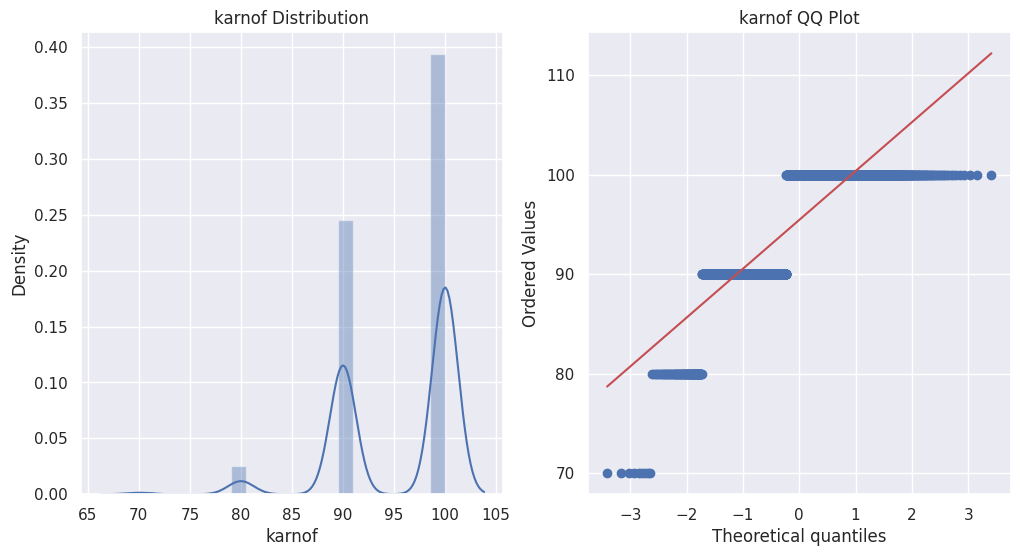

In [18]:
import scipy.stats as stats

plt.figure(figsize=(12, 6))

plt.subplot(121)
sns.distplot(df['karnof'])
plt.title('karnof Distribution')

plt.subplot(122)
stats.probplot(df['karnof'], dist="norm", plot=plt)
plt.title('karnof QQ Plot')

plt.show()

In [19]:
from sklearn.preprocessing import QuantileTransformer
qt_normal = QuantileTransformer(output_distribution='normal')

df['karnof'] = qt_normal.fit_transform(df[['karnof']])

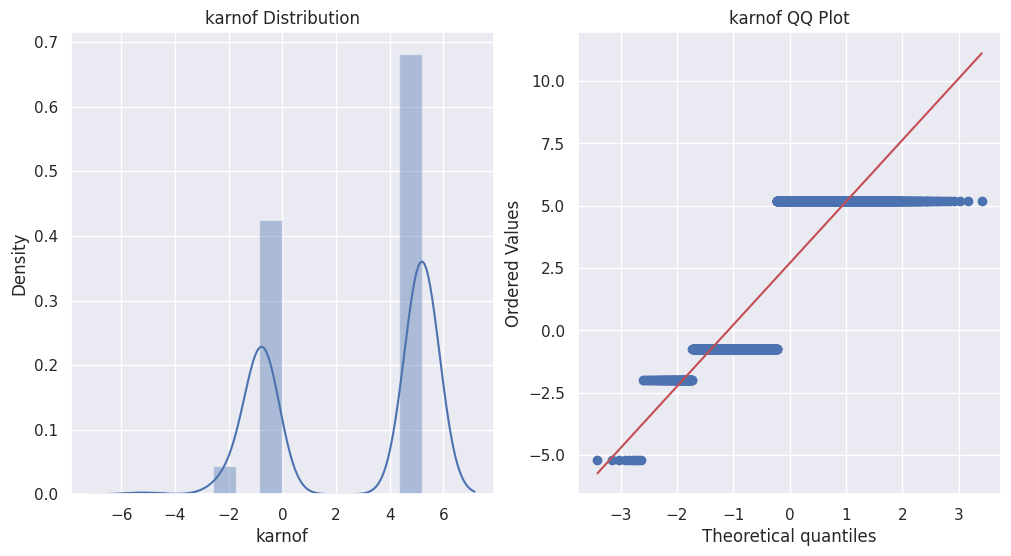

In [20]:
import scipy.stats as stats

plt.figure(figsize=(12, 6))

plt.subplot(121)
sns.distplot(df['karnof'])
plt.title('karnof Distribution')

plt.subplot(122)
stats.probplot(df['karnof'], dist="norm", plot=plt)
plt.title('karnof QQ Plot')

plt.show()

<Axes: xlabel='wtkg'>

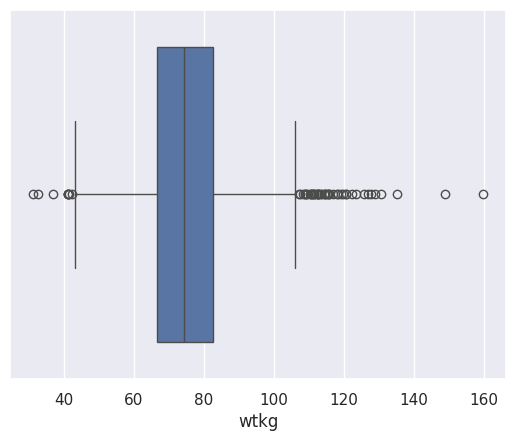

In [21]:
sns.boxplot(x=df['wtkg'])

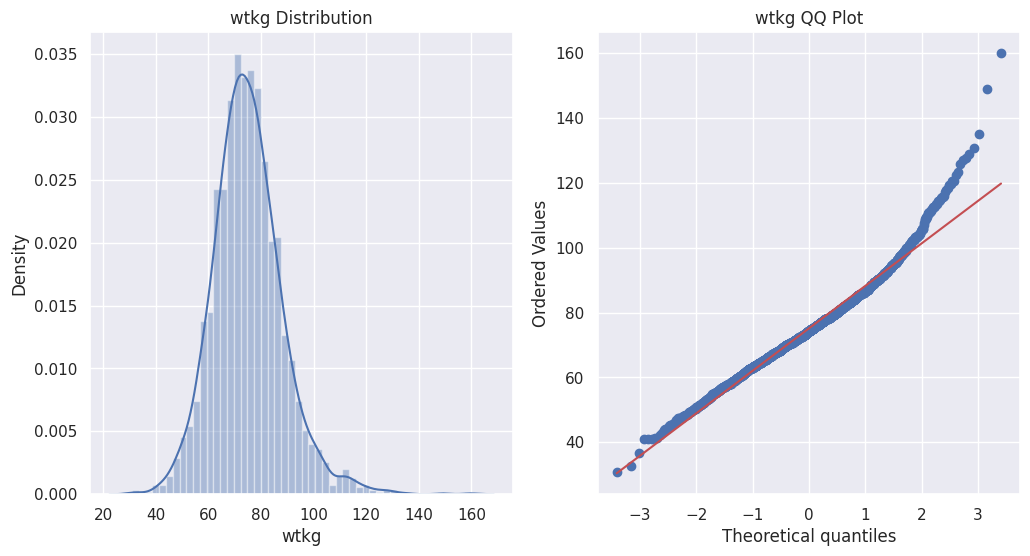

In [22]:
import scipy.stats as stats

plt.figure(figsize=(12, 6))

plt.subplot(121)
sns.distplot(df['wtkg'])
plt.title('wtkg Distribution')

plt.subplot(122)
stats.probplot(df['wtkg'], dist="norm", plot=plt)
plt.title('wtkg QQ Plot')

plt.show()

In [23]:
from sklearn.preprocessing import QuantileTransformer
qt_normal = QuantileTransformer(output_distribution='normal')

df['wtkg'] = qt_normal.fit_transform(df[['wtkg']])

In [24]:
percentile25=df["wtkg"].quantile(0.25)
percentile75=df["wtkg"].quantile(0.75)

In [25]:
iqr=percentile75 - percentile25
iqr

1.3537150337821378

In [26]:
upper_limit=percentile75 + 1.5*iqr # UPPER LIMIT
lower_limit=percentile25 - 1.5*iqr # LOWER LIMIT
print("upper_limit",upper_limit)
print("lower_limit",lower_limit)


upper_limit 2.7105851290420078
lower_limit -2.7042750060865437


In [27]:
new_df_cap = df.copy()

new_df_cap["wtkg"]= np.where(
    new_df_cap["wtkg"] > upper_limit,
    upper_limit,
    np.where(
        new_df_cap["wtkg"] < lower_limit,
        lower_limit,
        new_df_cap["wtkg"]
    )

)

In [28]:
df['wtkg'] = new_df_cap['wtkg']

<Axes: xlabel='wtkg'>

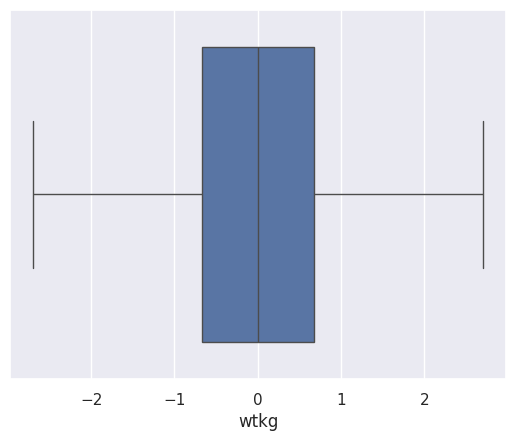

In [29]:
sns.boxplot(x=df['wtkg'])

data balancing check

In [30]:
df['infected'].value_counts()

,count
infected,
0,1618
1,521


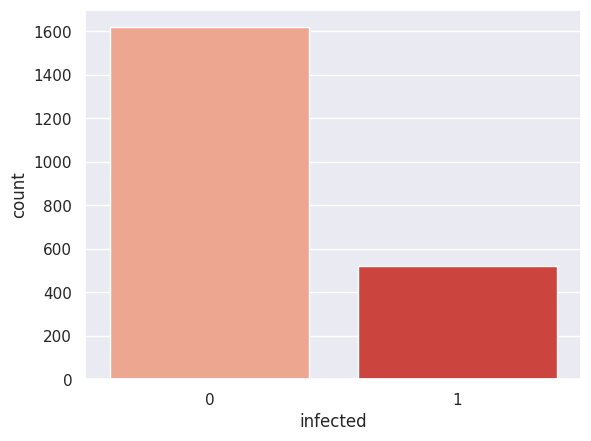

In [31]:
sns.countplot(x="infected",data=df, palette="Reds")
plt.show()

oversampling

In [32]:
X = df.drop('infected', axis=1)  # Features
y = df['infected']               # Target variable

In [33]:
from imblearn.over_sampling import RandomOverSampler

# Apply oversampling using RandomOverSampler
oversampler = RandomOverSampler(random_state=42)
X_oversampled, y_oversampled = oversampler.fit_resample(X, y)

In [34]:
# Create a DataFrame for the oversampled data
new_df = pd.DataFrame(X_oversampled, columns=X.columns)
new_df['infected'] = y_oversampled

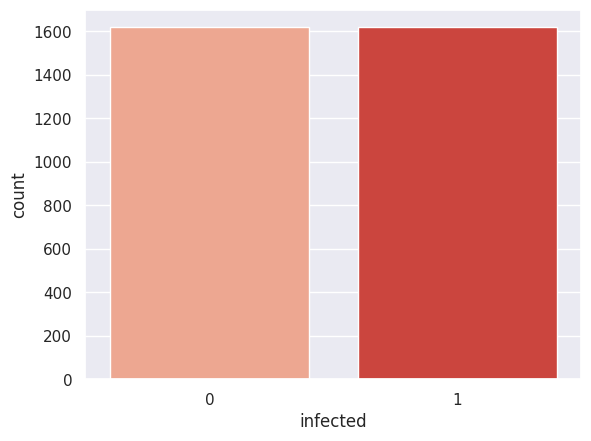

In [35]:
sns.countplot(x="infected",data=new_df, palette="Reds")
plt.show()

In [36]:
from sklearn import preprocessing
pre_process = preprocessing.MinMaxScaler().fit(X_oversampled)
x_transform = pre_process.fit_transform(X_oversampled)

In [37]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_transform, y_oversampled, test_size = .10, random_state = 101)

In [38]:
from sklearn.linear_model import LogisticRegression

print('Logistic Regression')
# Create instance of model
log_reg = LogisticRegression()

# Pass training data into model
log_reg.fit(x_train, y_train)


Logistic Regression


LogisticRegression()

In [39]:
from sklearn.metrics import accuracy_score
# prediction from the model
y_pred_log_reg = log_reg.predict(x_test)
# Score It

print('Logistic Regression')
# Accuracy
print('--'*30)
log_reg_accuracy = round(accuracy_score(y_test, y_pred_log_reg) * 100,2)
print('Accuracy', log_reg_accuracy,'%')

Logistic Regression
------------------------------------------------------------
Accuracy 84.88 %


Precision: 0.85
Recall: 0.85
------------------------------------------------------------
[[134  24]
 [ 25 141]]


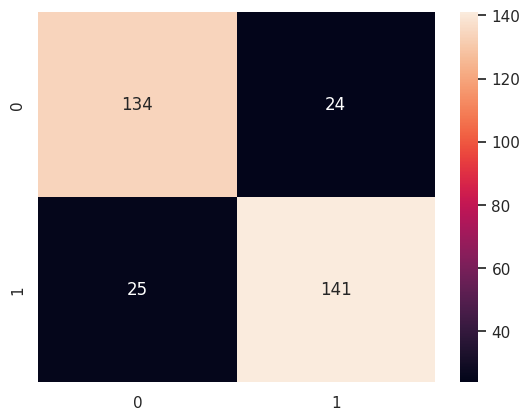

In [40]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix
# Calculate precision and recall
precision = precision_score(y_test, y_pred_log_reg)
recall = recall_score(y_test, y_pred_log_reg)

# Print the results
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print("--"*30)
# Calculate confusion matrix
confusion = confusion_matrix(y_test, y_pred_log_reg)
print(confusion)
sns.heatmap(confusion, annot=True, fmt="d")
plt.show()

In [41]:
from sklearn.ensemble import RandomForestClassifier

print('Random Forest Classifier')
# Create instance of model
rfc = RandomForestClassifier()

# Pass training data into model
rfc.fit(x_train, y_train)

Random Forest Classifier


RandomForestClassifier()

In [42]:
from sklearn.metrics import accuracy_score
# prediction from the model
y_pred_rfc = rfc.predict(x_test)
# Score It

print('Random Forest Classifier')
# Accuracy
print('--'*30)
rfc_accuracy = round(accuracy_score(y_test, y_pred_rfc) * 100,2)
print('Accuracy', rfc_accuracy,'%')

Random Forest Classifier
------------------------------------------------------------
Accuracy 95.68 %


Precision: 0.93
Recall: 0.99
------------------------------------------------------------


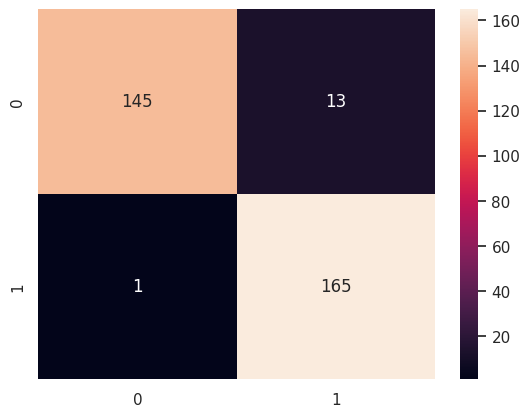

In [43]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix
# Calculate precision and recall
precision = precision_score(y_test, y_pred_rfc)
recall = recall_score(y_test, y_pred_rfc)

# Print the results
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print("--"*30)
# Calculate confusion matrix
confusion = confusion_matrix(y_test, y_pred_rfc)
sns.heatmap(confusion, annot=True, fmt="d")
plt.show()